In [179]:
import pandas as pd
import numpy as np
import random
import operator
import matplotlib.pyplot as plt

In [180]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat


In [181]:
def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )


In [182]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness


In [183]:
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate


In [184]:
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select


In [185]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome


In [186]:
def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover


In [187]:
def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate


In [188]:
def genetic_algorithm(cities, adjacency_mat, n_population=5, n_iter=20, selectivity=0.15, p_cross=0.5, p_mut=0.1, print_interval=100, return_history=False, verbose=False):
    
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best


In [189]:
def generate_cities(n_cities, factor=10):
    return np.random.rand(n_cities, 2) * n_cities * factor


In [190]:
def make_mat(coordinates):
    res = [
        [get_distance(city1, city2) for city2 in coordinates]
        for city1 in coordinates
    ]
    return np.asarray(res)

def get_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)


[[689.77988274 278.55960541]
 [309.05654609 708.01966373]
 [430.75233861 965.1211777 ]
 [830.74462317 370.34852004]
 [416.6625077  642.87926834]
 [772.22429393 380.16996914]
 [743.78247904 289.7329482 ]
 [192.36462397 935.14100002]
 [754.39926338 989.08208578]
 [859.89861699 948.84855842]
 [795.96191119 379.35180746]
 [196.13003583 265.65318513]
 [335.59813706 314.9384859 ]
 [459.47084059 674.9147275 ]
 [890.63113793 125.69933685]
 [ 21.0923239  127.93192683]
 [717.49491514 723.09116762]
 [720.71022875 657.65380233]
 [916.87188768 283.15247033]
 [210.65616842 878.33887698]
 [104.99347792 535.09492432]
 [331.54951642 138.66830778]
 [935.17844949 783.56600025]
 [297.73548389 561.78326217]
 [799.87745131 119.01887523]
 [ 18.79068378 980.07672041]
 [438.28040149 300.25767234]
 [376.6056487  398.38376699]
 [277.07837704 873.50010998]
 [863.85702953 188.82901364]
 [106.99812303 713.98112809]
 [305.92992312 491.8880064 ]
 [639.0654516  621.83301324]
 [ 62.66404608 522.28844599]
 [577.98265542

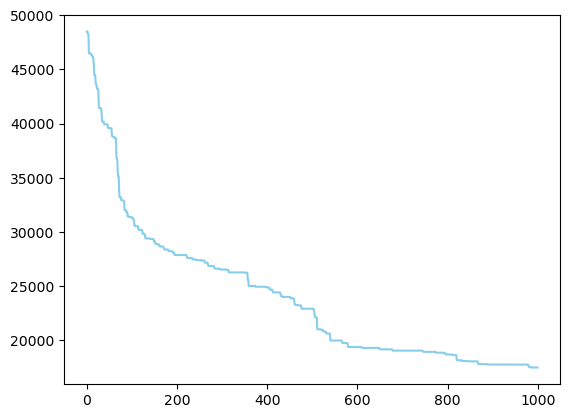

[74, 84, 50, 72, 38, 99, 55, 64, 89, 18, 65, 70, 86, 88, 10, 3, 5, 35, 60, 14, 94, 29, 71, 87, 46, 53, 15, 39, 26, 44, 93, 51, 31, 37, 58, 25, 68, 62, 33, 11, 67, 21, 91, 52, 6, 66, 83, 22, 69, 61, 47, 82, 79, 7, 28, 78, 36, 96, 2, 13, 34, 40, 92, 8, 9, 42, 16, 43, 54, 19, 85, 45, 73, 0, 77, 81, 4, 97, 30, 41, 76, 95, 57, 49, 23, 80, 48, 98, 24, 56, 17, 32, 75, 1, 63, 20, 12, 59, 27, 90]


In [194]:
cities = range(100)
city_coordinates = generate_cities(len(cities))
print(city_coordinates)
adjacency_mat = make_mat(city_coordinates)
best, history = genetic_algorithm(cities, adjacency_mat, n_population=20, n_iter=1000, verbose=False, return_history=True)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)
